In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from sklearn.linear_model import LinearRegression

dataset_url = "https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data"


In [2]:
data = pd.read_csv("Data/train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Drop ID because it doesn't help with our analysis and it really isn't needed

data.drop(["Id"], axis = 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
data["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [7]:
data["PoolQC"].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [8]:
data["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [9]:
data["MiscVal"].unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300,  1150,  2500], dtype=int64)

In [10]:
# Drop Alley, PoolQC, MiscFeature, MiscVal and Fence columns because they have too many null values

data.drop(columns = ["Alley", "PoolQC", "MiscFeature", "MiscVal", "Fence"], inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [12]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000


In [13]:
# Correlation matrix to see variables most correlated with SalePrice. We'll test all variables
# with a correlation to SalePrice higher than 0.4

corr_matrix = data.corr()["SalePrice"].sort_values(ascending = False)

print(corr_matrix)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


C:\Users\tglhi\AppData\Local\Temp\ipykernel_9824\955284867.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()["SalePrice"].sort_values(ascending = False)


In [14]:
# We'll run hypothesis tests on all variables with a correlation to Sale Price higher than 0.4, to verify if they have
# an effect on a houses's Sale Price. To be thorough and also to practice what we've seen in class, we'll run 1 sample ttests,
# ztests on values in the 75th percentile and in the 25th percentile. We'll also plot scatter plots for all of them to
# get a visual idea of the correlation of each variable with SalePrice.


In [15]:
correlated_vars = [correlated_index for correlated_index in corr_matrix.index if 1 > corr_matrix[correlated_index] >= 0.4]
print(correlated_vars)
        

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']


In [18]:
data["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [19]:
data["OverallQual"].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [20]:
high_qual = data[data["OverallQual"] >= 7]
print(len(high_qual))
t, p = stats.ttest_1samp(high_qual["SalePrice"], data["SalePrice"].mean())
print(p)

548
2.1905233855273123e-60


In [21]:
low_qual = data[data["OverallQual"] <= 5]
print(len(low_qual))
t, p = stats.ttest_1samp(low_qual["SalePrice"], data["SalePrice"].mean())
print(p)

538
4.1543933606532914e-169


In [22]:
mu = data["SalePrice"].mean()
print(mu)

180921.19589041095


In [23]:
ztest(high_qual["SalePrice"], value = mu) 

(18.637038593137255, 1.6090557682364703e-77)

In [24]:
ztest(low_qual["SalePrice"], value = mu) 

(-41.36843987290575, 0.0)

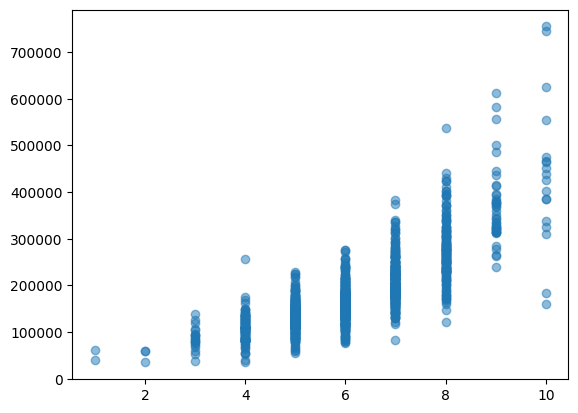

In [162]:
plt.scatter(data["OverallQual"], data["SalePrice"], alpha = 0.5)

In [25]:
# La variable OverallQual sí parece afectar al comportamiento del precio de venta y la tendremos en cuenta para el modelo.
# Tanto en el Ztest como en el Ttest para el percentil más alto y más vajo de OverallQual p siempre es menor a 0.05 
# por lo que podemos rechazar la hipotesis nula de que esta variable no afecta al precio de venta. 


In [26]:
gr_liv_area_mean = data["GrLivArea"].mean()
gr_liv_area_max = data["GrLivArea"].max()
gr_liv_area_median = data["GrLivArea"].median()
print(gr_liv_area_mean)
print(gr_liv_area_max)
print(gr_liv_area_median)

1515.463698630137
5642
1464.0


In [27]:
data["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [28]:
high_gr_liv_area = data[data["GrLivArea"] >= 1776.75]
print(len(high_gr_liv_area))
t, p = stats.ttest_1samp(high_gr_liv_area["SalePrice"], data["SalePrice"].mean())
print(p)

365
6.910424756339901e-40


In [29]:
low_gr_liv_area = data[data["GrLivArea"] <= 1129.5]
print(len(low_gr_liv_area))
t, p = stats.ttest_1samp(low_gr_liv_area["SalePrice"], data["SalePrice"].mean())
print(p)

365
8.516461106243393e-148


In [30]:
ztest(high_gr_liv_area["SalePrice"], value = mu)

(14.987168845600946, 8.906981444538105e-51)

In [31]:
ztest(low_gr_liv_area["SalePrice"], value = mu)

(-44.00462910431102, 0.0)

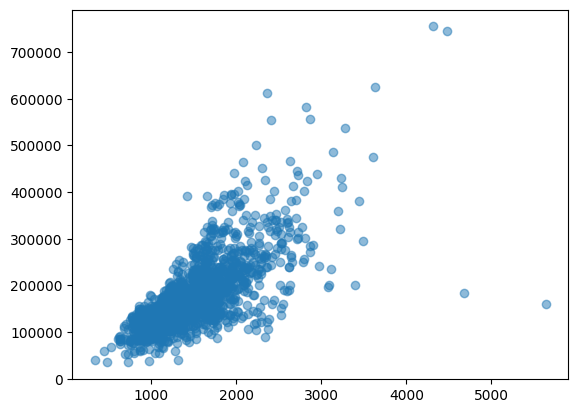

In [163]:
plt.scatter(data["GrLivArea"], data["SalePrice"], alpha = 0.5)

In [32]:
# La variable GrLivArea sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de GrLivArea
# el p value siempre da por debajo de 0.05

In [33]:
data["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [34]:
data["GarageCars"].describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [35]:
high_garage_cars = data[data["GarageCars"] >= 2]
print(len(high_garage_cars))
t, p = stats.ttest_1samp(high_garage_cars["SalePrice"], data["SalePrice"].mean())
print(p)

1010
1.348591369581224e-22


In [36]:
low_garage_cars = data[data["GarageCars"] <= 1]
print(len(low_garage_cars))
t, p = stats.ttest_1samp(low_garage_cars["SalePrice"], data["SalePrice"].mean())
print(p)

450
5.0064421264867413e-141


In [37]:
ztest(high_garage_cars["SalePrice"], value = mu)

(10.020876976723995, 1.234030501915899e-23)

In [38]:
ztest(low_garage_cars["SalePrice"], value = mu)

(-37.65453166510719, 2.75812929748533e-310)

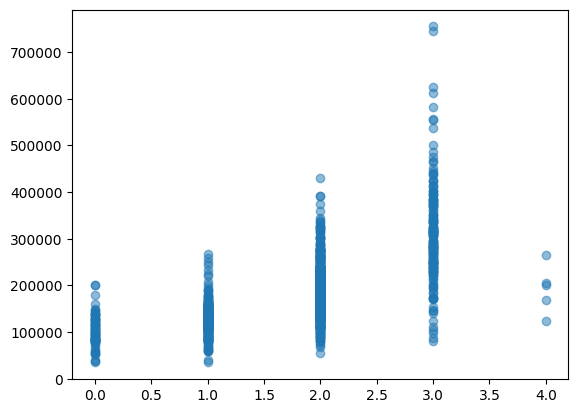

In [164]:
plt.scatter(data["GarageCars"], data["SalePrice"], alpha = 0.5)

In [39]:
# La variable GarageCars sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de GarageCars
# el p value siempre da por debajo de 0.05

In [40]:
data["TotalBsmtSF"].value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64

In [41]:
data["TotalBsmtSF"].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [42]:
high_bsmt_sf = data[data["TotalBsmtSF"] >= 1298.25]
print(len(high_bsmt_sf))
t, p = stats.ttest_1samp(high_bsmt_sf["SalePrice"], data["SalePrice"].mean())
print(p)

365
3.3583349844378974e-39


In [43]:
low_bsmt_sf = data[data["TotalBsmtSF"] <= 795.75]
print(len(low_bsmt_sf))
t, p = stats.ttest_1samp(low_bsmt_sf["SalePrice"], data["SalePrice"].mean())
print(p)

365
1.84305940916193e-62


In [44]:
ztest(high_bsmt_sf["SalePrice"], value = mu)

(14.817104686367502, 1.1357534017393782e-49)

In [45]:
ztest(low_bsmt_sf["SalePrice"], value = mu)

(-20.456481009648925, 5.260043698017635e-93)

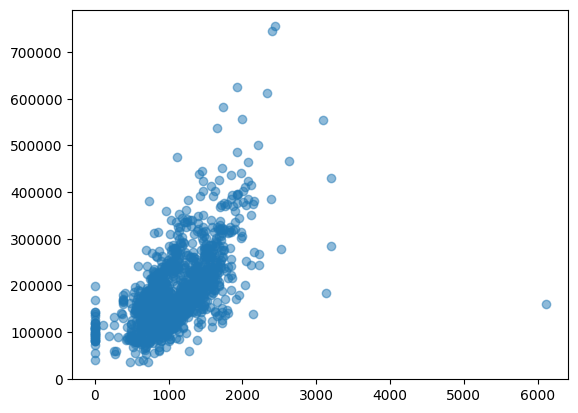

In [165]:
plt.scatter(data["TotalBsmtSF"], data["SalePrice"], alpha = 0.5)

In [46]:
# La variable TotalBsmtSF sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de TotalBsmtSF
# el p value siempre da por debajo de 0.05

In [47]:
data["GarageArea"].value_counts()

0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64

In [48]:
data["GarageArea"].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [49]:
high_garage_area = data[data["GarageArea"] >= 576]
print(len(high_garage_area))
t, p = stats.ttest_1samp(high_garage_area["SalePrice"], data["SalePrice"].mean())
print(p)

399
1.1882668973108195e-32


In [50]:
low_garage_area = data[data["GarageArea"] <= 334.5]
print(len(low_garage_area))
t, p = stats.ttest_1samp(low_garage_area["SalePrice"], data["SalePrice"].mean())
print(p)

365
2.1098640487184587e-113


In [51]:
ztest(high_garage_area["SalePrice"], value= mu)

(13.050347447753012, 6.32582501335138e-39)

In [52]:
ztest(low_garage_area["SalePrice"], value= mu)

(-33.54408963643127, 1.0979220118906396e-246)

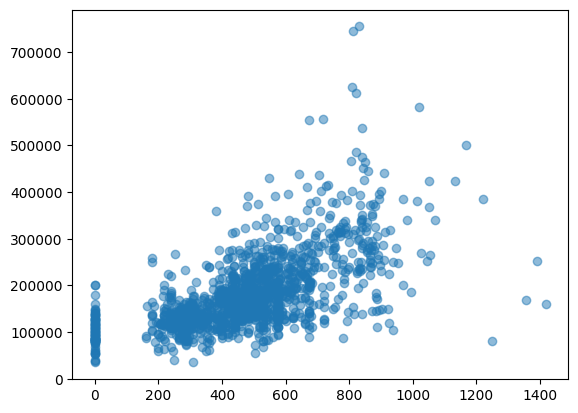

In [166]:
plt.scatter(data["GarageArea"], data["SalePrice"], alpha = 0.5)

In [53]:
# La variable TotalBsmtSF sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de TotalBsmtSF
# el p value siempre da por debajo de 0.05

In [54]:
data["1stFlrSF"].value_counts()

864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: 1stFlrSF, Length: 753, dtype: int64

In [55]:
data["1stFlrSF"].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [56]:
high_1st_floor = data[data["1stFlrSF"] >= 1391.25]
print(len(high_1st_floor))
t,p = stats.ttest_1samp(high_1st_floor["SalePrice"], data["SalePrice"].mean())
print(p)

365
3.285468213528032e-35


In [57]:
low_1st_floor = data[data["1stFlrSF"] <= 882]
print(len(low_1st_floor))
t,p = stats.ttest_1samp(low_1st_floor["SalePrice"], data["SalePrice"].mean())
print(p)

368
1.5584147662576598e-61


In [58]:
ztest(high_1st_floor["SalePrice"], value = mu)

(13.818510788385561, 1.971053760775726e-43)

In [59]:
ztest(low_1st_floor["SalePrice"], value = mu)

(-20.197630727432692, 1.0270819649461722e-90)

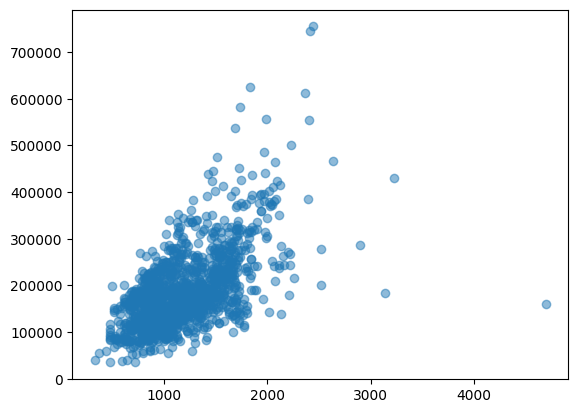

In [167]:
plt.scatter(data["1stFlrSF"], data["SalePrice"], alpha = 0.5)

In [60]:
# La variable 1stFlrSF sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de 1stFlrSF
# el p value siempre da por debajo de 0.05

In [61]:
data["FullBath"].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [62]:
data["FullBath"].describe()

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

In [63]:
high_full_bath = data[data["FullBath"] >= 2]
print(len(high_full_bath))
t, p = stats.ttest_1samp(high_full_bath["SalePrice"], data["SalePrice"].mean())
print(p)

801
1.2505028435924436e-34


In [64]:
low_full_bath = data[data["FullBath"] <= 1]
print(len(low_full_bath))
t, p = stats.ttest_1samp(low_full_bath["SalePrice"], data["SalePrice"].mean())
print(p)

659
3.230368941888054e-110


In [65]:
ztest(high_full_bath["SalePrice"], value = mu)

(12.879417615024192, 5.877740474971378e-38)

In [66]:
ztest(low_full_bath["SalePrice"], value = mu)

(-27.28294497462012, 6.759979911379646e-164)

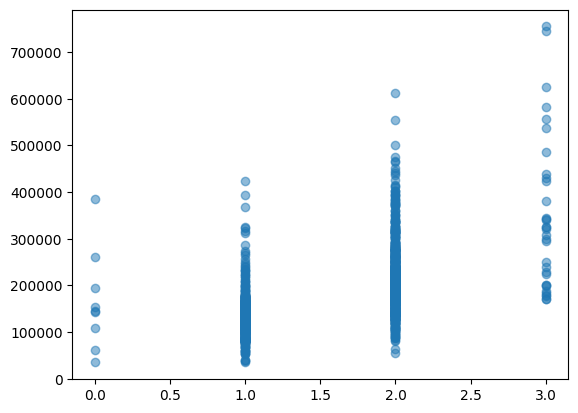

In [168]:
plt.scatter(data["FullBath"], data["SalePrice"], alpha = 0.5)

In [67]:
# La variable FullBath sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de FullBath
# el p value siempre da por debajo de 0.05

In [68]:
data["TotRmsAbvGrd"].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [69]:
data["TotRmsAbvGrd"].describe()

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

In [70]:
high_rms_abv_grd = data[data["TotRmsAbvGrd"] >= 7]
print(len(high_rms_abv_grd))
t, p = stats.ttest_1samp(high_rms_abv_grd["SalePrice"], data["SalePrice"].mean())
print(p)

668
3.8222169301503934e-26


In [71]:
low_rms_abv_grd = data[data["TotRmsAbvGrd"] <= 5]
print(len(low_rms_abv_grd))
t, p = stats.ttest_1samp(low_rms_abv_grd["SalePrice"], data["SalePrice"].mean())
print(p)

390
4.982264020953297e-56


In [72]:
ztest(high_rms_abv_grd["SalePrice"], value = mu)

(11.040483135113618, 2.4371915673216756e-28)

In [73]:
ztest(low_rms_abv_grd["SalePrice"], value = mu)

(-18.676617158953505, 7.6730389476673805e-78)

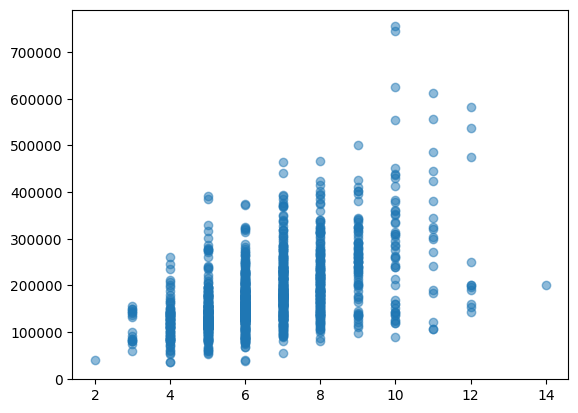

In [169]:
plt.scatter(data["TotRmsAbvGrd"], data["SalePrice"], alpha = 0.5)

In [74]:
# La variable TotTmsAbvGrd sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de TotTmsAbvGrd
# el p value siempre da por debajo de 0.05

In [75]:
data["MasVnrArea"].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [76]:
data["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [77]:
data["MasVnrArea"].median()

0.0

In [78]:
high_mas_vn_area = data[data["MasVnrArea"] >= 166]
print(len(high_mas_vn_area))
t, p = stats.ttest_1samp(high_mas_vn_area["SalePrice"], data["SalePrice"].mean())
print(p)

364
3.5194649803200493e-22


In [79]:
no_mas_vn_area = data[data["MasVnrArea"] == 0]
print(len(no_mas_vn_area))
t, p = stats.ttest_1samp(no_mas_vn_area["SalePrice"], data["SalePrice"].mean())
print(p)

861
3.0183096717962444e-29


In [80]:
ztest(high_mas_vn_area["SalePrice"], value = mu)

(10.352621599894976, 4.0718077008782944e-25)

In [81]:
ztest(no_mas_vn_area["SalePrice"], value = mu)

(-11.65437608136591, 2.179710915229915e-31)

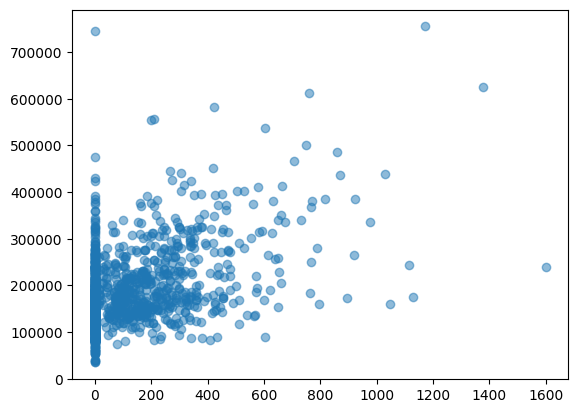

In [170]:
plt.scatter(data["MasVnrArea"], data["SalePrice"], alpha = 0.5)

In [82]:
# La variable MasVnrArea sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de MasVnrArea
# el p value siempre da por debajo de 0.05

In [83]:
data["Fireplaces"].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [84]:
data["Fireplaces"].describe()

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

In [85]:
high_fireplaces = data[data["Fireplaces"] >= 1]
print(len(high_fireplaces))
t, p = stats.ttest_1samp(high_fireplaces["SalePrice"], data["SalePrice"].mean())
print(p)

770
1.1886529868724695e-27


In [86]:
no_fireplaces = data[data["Fireplaces"] == 0]
print(len(no_fireplaces))
t, p = stats.ttest_1samp(no_fireplaces["SalePrice"], data["SalePrice"].mean())
print(p)

690
1.00415121048335e-89


In [87]:
ztest(high_fireplaces["SalePrice"], value = mu)

(11.335658655084845, 8.73722907472119e-30)

In [88]:
ztest(no_fireplaces["SalePrice"], value = mu)

(-23.42738646698071, 2.248058764116957e-121)

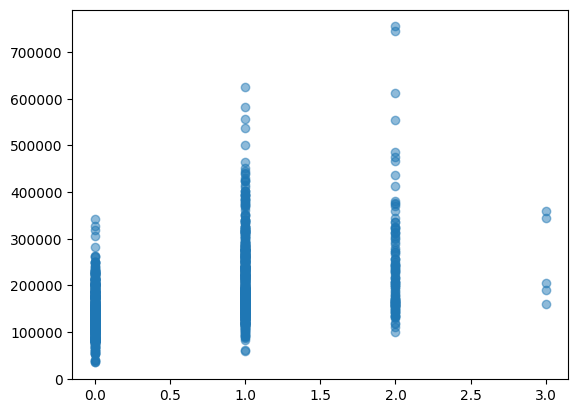

In [171]:
plt.scatter(data["Fireplaces"], data["SalePrice"], alpha = 0.5)

In [89]:
# La variable Fireplaces sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de Fireplaces
# el p value siempre da por debajo de 0.05

In [90]:
data["YearBuilt"].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

In [91]:
data["YearBuilt"].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [92]:
recent_year = data[data["YearBuilt"] >= 2000]
print(len(recent_year))
t, p = stats.ttest_1samp(recent_year["SalePrice"], data["SalePrice"].mean())
print(p)

388
7.332195265950093e-39


In [93]:
ancient_year = data[data["YearBuilt"] <= 1954]
print(len(ancient_year))
t, p = stats.ttest_1samp(ancient_year["SalePrice"], data["SalePrice"].mean())
print(p)

385
1.1252585209442499e-53


In [94]:
ztest(recent_year["SalePrice"], value = mu)

(14.62257412918771, 2.0163040235932324e-48)

In [95]:
ztest(ancient_year["SalePrice"], value = mu)

(-18.16732852502093, 9.364824564518587e-74)

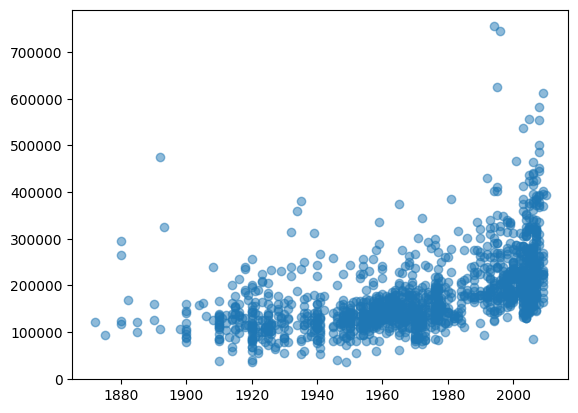

In [172]:
plt.scatter(data["YearBuilt"], data["SalePrice"], alpha = 0.5)

In [96]:
# La variable YearBuilt sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de YearBuilt
# el p value siempre da por debajo de 0.05

In [97]:
data["YearRemodAdd"].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [98]:
data["YearRemodAdd"].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [99]:
recent_remod = data[data["YearRemodAdd"] >= 2004]
print(len(recent_remod))
t, p = stats.ttest_1samp(recent_remod["SalePrice"], data["SalePrice"].mean())
print(p)

377
1.6869971835108562e-21


In [100]:
ancient_remod = data[data["YearRemodAdd"] <= 1967]
print(len(ancient_remod))
t, p = stats.ttest_1samp(ancient_remod["SalePrice"], data["SalePrice"].mean())
print(p)

376
7.93370608176495e-90


In [101]:
ztest(recent_remod["SalePrice"], value = mu)

(10.134235619498003, 3.894071411802755e-24)

In [102]:
ztest(ancient_remod["SalePrice"], value = mu)

(-26.9696301855891, 3.357732141322015e-160)

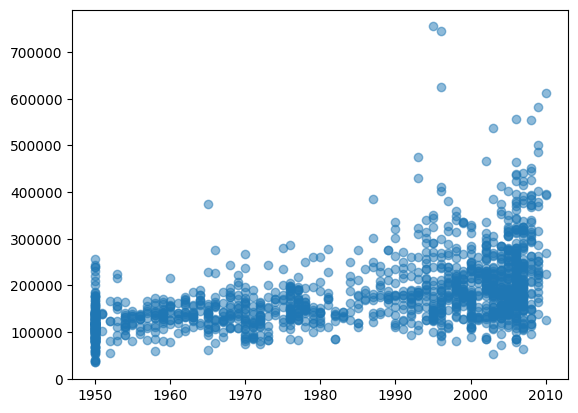

In [173]:
plt.scatter(data["YearRemodAdd"], data["SalePrice"], alpha = 0.5)

In [103]:
# La variable YearRemodAdd sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de YearRemodAdd
# el p value siempre da por debajo de 0.05

In [104]:
data["GarageYrBlt"].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [105]:
data["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [106]:
recent_grg_remod = data[data["GarageYrBlt"] >= 2002]
print(len(recent_grg_remod))
t, p = stats.ttest_1samp(recent_grg_remod["SalePrice"], data["SalePrice"].mean())
print(p)

355
1.6441527833076308e-32


In [107]:
ancient_grg_remod = data[data["GarageYrBlt"] <= 1961]
print(len(ancient_grg_remod))
t, p = stats.ttest_1samp(ancient_grg_remod["SalePrice"], data["SalePrice"].mean())
print(p)

347
1.7152711648536816e-42


In [108]:
ztest(recent_grg_remod["SalePrice"], value = mu)

(13.16945262258481, 1.3154793288899487e-39)

In [109]:
ztest(ancient_grg_remod["SalePrice"], value = mu)

(-15.743217434477366, 7.645535023636213e-56)

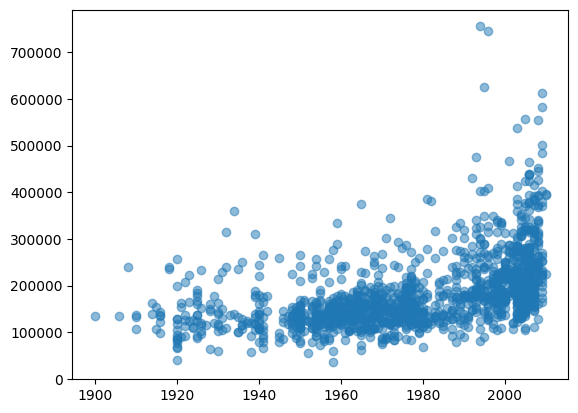

In [174]:
plt.scatter(data["GarageYrBlt"], data["SalePrice"], alpha = 0.5)

In [110]:
# La variable GarageYrBlt sí afecta a SalePrice. Si hacemos ttest y ztest con el percentil más alto y más bajo de GarageYrBlt
# el p value siempre da por debajo de 0.05

In [ ]:
# Having tested all selected variables, we've been able to ascertain that they all have an effect on SalePrice, so we'll
# build our linear regression model using all of them

In [111]:
df_for_model = data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 
                     '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 
                     'GarageYrBlt', 'MasVnrArea', 'Fireplaces', "SalePrice"]]

In [112]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   FullBath      1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   YearBuilt     1460 non-null   int64  
 9   YearRemodAdd  1460 non-null   int64  
 10  GarageYrBlt   1379 non-null   float64
 11  MasVnrArea    1452 non-null   float64
 12  Fireplaces    1460 non-null   int64  
 13  SalePrice     1460 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 159.8 KB


In [113]:
df_for_model.dropna(how = "any", inplace = True)

C:\Users\tglhi\AppData\Local\Temp\ipykernel_9824\2918446350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model.dropna(how = "any", inplace = True)


In [114]:
y = pd.Series(df_for_model["SalePrice"])

In [115]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 1371 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1371 non-null   int64
dtypes: int64(1)
memory usage: 21.4 KB


In [116]:
df_for_model.drop(columns = ["SalePrice"], inplace = True)

C:\Users\tglhi\AppData\Local\Temp\ipykernel_9824\408252902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model.drop(columns = ["SalePrice"], inplace = True)


In [117]:
tito_model = LinearRegression()

In [118]:
tito_model.fit(df_for_model, y)

LinearRegression()

In [119]:
tito_model.score(df_for_model, y)

0.7763842265567855

In [120]:
valores = df_for_model.iloc[[10,15,20,25]]

In [121]:
y.iloc[[10,15,20,25]]

10    129500
15    132000
20    325300
25    256300
Name: SalePrice, dtype: int64

In [122]:
tito_model.predict(valores)

array([111267.22098131, 152616.51004735, 297946.52444235, 289326.56752545])

In [123]:
########################################################################

In [146]:
test_data = pd.read_csv("Data/test.csv")

In [147]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [148]:
test_df_for_model = test_data[["Id", 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 
                     '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 
                     'GarageYrBlt', 'MasVnrArea', 'Fireplaces']]

In [149]:
test_target = pd.read_csv("Data/sample_submission.csv")

In [150]:
final_test_df_for_model = pd.merge(test_df_for_model, test_target, on = "Id")

In [151]:
final_test_df_for_model.dropna(how = "any", inplace = True)

In [152]:
test_y = pd.Series(final_test_df_for_model["SalePrice"])

In [153]:
final_test_df_for_model.drop(columns = ["Id", "SalePrice"], inplace = True)

In [154]:
final_test_df_for_model.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,1961.0,0.0,0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,1958.0,108.0,0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,1997.0,0.0,1
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,1998.0,20.0,1
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,1992.0,0.0,0


In [155]:
final_test_df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 0 to 1458
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1366 non-null   int64  
 1   GrLivArea     1366 non-null   int64  
 2   GarageCars    1366 non-null   float64
 3   GarageArea    1366 non-null   float64
 4   TotalBsmtSF   1366 non-null   float64
 5   1stFlrSF      1366 non-null   int64  
 6   FullBath      1366 non-null   int64  
 7   TotRmsAbvGrd  1366 non-null   int64  
 8   YearBuilt     1366 non-null   int64  
 9   YearRemodAdd  1366 non-null   int64  
 10  GarageYrBlt   1366 non-null   float64
 11  MasVnrArea    1366 non-null   float64
 12  Fireplaces    1366 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 149.4 KB


In [156]:
test_y.info()

<class 'pandas.core.series.Series'>
Int64Index: 1366 entries, 0 to 1458
Series name: SalePrice
Non-Null Count  Dtype  
--------------  -----  
1366 non-null   float64
dtypes: float64(1)
memory usage: 21.3 KB


In [157]:
tito_model.score(final_test_df_for_model, test_y)

-15.966630830044434

In [ ]:
tito_model.score(test_df_for_model, y)

In [158]:
test_valores = final_test_df_for_model.iloc[[10,15,20,25]]

In [159]:
test_y.iloc[[10,15,20,25]]

10    157933.279456
15    179460.965187
20    186544.114328
25    174350.470677
Name: SalePrice, dtype: float64

In [160]:
tito_model.predict(test_valores)

array([207537.28026714, 327816.51876405, 302149.50645513, 212405.85547109])